<a href="https://colab.research.google.com/github/Hamza-Atiq/Innoquest-choret1-AI-ML-Training-/blob/main/Assignmet_DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading CSV file

In [2]:
df = pd.read_csv('/content/Lending-company.csv')

In [3]:
df.head()

,LoanID,StringID,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360,LoanStatus
0,1,LoanID_1,Product B,Female,Location 3,Region 2,17600.0,04/07/2018,2200,45,365,3221,4166,14621,Active
1,2,LoanID_2,Product D,Female,Location 6,Region 6,NaN,02/01/2019,2200,45,365,3161,4096,16041,Active
2,3,LoanID_3,Product B,Male,Location 8,Region 3,16600.0,08/12/2016,1000,45,365,2260,3205,16340,NaN
3,4,LoanID_4,Product A,Male,Location 26,Region 2,17600.0,NaN,2200,45,365,3141,4166,16321,Active
4,5,LoanID_5,Product B,Female,Location 34,Region 3,21250.0,28/10/2017,2200,55,365,3570,4745,14720,Active


In [4]:
df.shape

(1043, 15)

In [5]:
df.columns

Index(['LoanID', 'StringID', 'Product', 'CustomerGender', 'Location', 'Region',
       'TotalPrice', 'StartDate', 'Deposit', 'DailyRate', 'TotalDaysYr',
       'AmtPaid36', 'AmtPaid60', 'AmtPaid360', 'LoanStatus'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          1043 non-null   int64  
 1   StringID        1043 non-null   object 
 2   Product         1043 non-null   object 
 3   CustomerGender  1043 non-null   object 
 4   Location        1043 non-null   object 
 5   Region          1042 non-null   object 
 6   TotalPrice      1018 non-null   float64
 7   StartDate       1042 non-null   object 
 8   Deposit         1043 non-null   int64  
 9   DailyRate       1043 non-null   int64  
 10  TotalDaysYr     1043 non-null   int64  
 11  AmtPaid36       1043 non-null   int64  
 12  AmtPaid60       1043 non-null   int64  
 13  AmtPaid360      1043 non-null   int64  
 14  LoanStatus      1006 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 122.4+ KB


In [7]:
df.describe()

,LoanID,TotalPrice,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360
count,1043.000000,1018.000000,1043.000000,1043.000000,1043.0,1043.000000,1043.000000,1043.000000
mean,522.000000,19562.843811,2528.092042,50.834132,365.0,3901.857143,5214.393097,17122.131352
std,301.232468,5955.588065,1504.467724,11.567390,0.0,2537.597667,2850.327133,5910.916736
min,1.000000,13475.000000,1000.000000,30.000000,365.0,-2770.000000,-2945.000000,650.000000
25%,261.500000,16300.000000,2200.000000,45.000000,365.0,2840.500000,3822.000000,15560.500000
50%,522.000000,17600.000000,2200.000000,45.000000,365.0,3420.000000,4742.000000,16617.000000
75%,782.500000,20950.000000,2200.000000,55.000000,365.0,5075.500000,6393.000000,19977.500000
max,1043.000000,70225.000000,8000.000000,150.000000,365.0,18851.000000,22143.000000,65001.000000


In [8]:
df.isnull().sum()

,0
LoanID,0
StringID,0
Product,0
CustomerGender,0
Location,0
Region,1
TotalPrice,25
StartDate,1
Deposit,0
DailyRate,0


In [9]:
df.duplicated().sum()

0

# 1- Drop the 'LoanID' and 'StringID' columns.


In [10]:
df.drop(['LoanID', 'StringID'], axis=1, inplace=True)

In [11]:
df.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360,LoanStatus
0,Product B,Female,Location 3,Region 2,17600.0,04/07/2018,2200,45,365,3221,4166,14621,Active
1,Product D,Female,Location 6,Region 6,NaN,02/01/2019,2200,45,365,3161,4096,16041,Active
2,Product B,Male,Location 8,Region 3,16600.0,08/12/2016,1000,45,365,2260,3205,16340,NaN
3,Product A,Male,Location 26,Region 2,17600.0,NaN,2200,45,365,3141,4166,16321,Active
4,Product B,Female,Location 34,Region 3,21250.0,28/10/2017,2200,55,365,3570,4745,14720,Active


In [12]:
df.shape

(1043, 13)

# 2- Turn the Product categories into numeric data in the following way:
➢ Map Product A to 0.

➢ Map Product B to 1.

➢ Map Products C, D, E and F to 2.

In [13]:
df['Product'].value_counts()

,count
Product,
Product B,400
Product A,354
Product C,137
Product D,130
Product E,20
Product F,2


In [14]:
df['Product'] = df['Product'].map({'Product A': 0, 'Product B': 1, 'Product C': 2, 'Product D': 2, 'Product E': 2, 'Product F': 2})

In [15]:
df['Product'].value_counts()

,count
Product,
1,400
0,354
2,289


# 3- For the Gender, replace 'NotSpecified' with the mode of the column.

In [16]:
df['CustomerGender'].value_counts()

,count
CustomerGender,
Male,624
Female,333
NotSpecified,86


In [17]:
df['CustomerGender'].mode()

,CustomerGender
0,Male


In [18]:
df['CustomerGender'] = df['CustomerGender'].replace('NotSpecified', 'Male')

In [19]:
df['CustomerGender'].value_counts()

,count
CustomerGender,
Male,710
Female,333


# 4- Extract the Location numbers and use them as values and apply the same procedure to the Region column.

# Make sure they are int or float type.


In [20]:
df['Location'].value_counts()

,count
Location,
Location 25,31
Location 30,27
Location 3,24
Location 26,23
Location 22,21
...,...
Location 168,1
Location 136,1
Location 99,1


In [21]:
len(df['Location'].unique())

296

In [22]:
df['Region'].value_counts()

,count
Region,
Region 6,326
Region 3,206
Region 2,188
Region 1,131
Region 4,62
Region 7,47
Region 5,30
Region 8,10
Region 15,8


In [23]:
len(df['Region'].unique())

19

In [24]:
df['Location'] = df['Location'].apply(lambda x: int(x.split()[-1]))

In [25]:
df['Location'].value_counts()

,count
Location,
25,31
30,27
3,24
26,23
22,21
...,...
168,1
136,1
99,1


In [26]:
df['Location'].dtype

dtype('int64')

In [27]:
df['Region'].dtype

dtype('O')

In [28]:
df['Region'].isna().sum()

1

In [29]:
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

In [30]:
df['Region'].isna().sum()

0

In [31]:
df['Region'] = df['Region'].apply(lambda x: int(x.split()[-1]))

In [32]:
df['Region'].dtype

dtype('int64')

# 5- Fill the missing values in 'TotalPrice' with the column mean.

In [33]:
df['TotalPrice'].isna().sum()

25

In [34]:
df['TotalPrice'] = df['TotalPrice'].fillna(df['TotalPrice'].mean())

In [35]:
df['TotalPrice'].isna().sum()

0

In [36]:
df.shape

(1043, 13)

# 6- Drop all rows with missing date values and extract the month and weekday as separate columns. Don’t forget to drop the 'StartDate' column at the end.


In [37]:
df['StartDate'].isna().sum()

1

In [38]:
df.dropna(subset=['StartDate'], inplace=True)

In [39]:
df.shape

(1042, 13)

In [40]:
df['Month'] = pd.to_datetime(df['StartDate'], format='%d/%m/%Y').dt.month

In [41]:
df.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360,LoanStatus,Month
0,1,Female,3,2,17600.000000,04/07/2018,2200,45,365,3221,4166,14621,Active,7
1,2,Female,6,6,19562.843811,02/01/2019,2200,45,365,3161,4096,16041,Active,1
2,1,Male,8,3,16600.000000,08/12/2016,1000,45,365,2260,3205,16340,NaN,12
4,1,Female,34,3,21250.000000,28/10/2017,2200,55,365,3570,4745,14720,Active,10
5,0,Male,34,1,19562.843811,19/04/2019,2200,45,365,3301,4066,15141,Active,4


In [42]:
df['Weekday'] = pd.to_datetime(df['StartDate'], format='%d/%m/%Y').dt.day_of_week

In [43]:
df.shape

(1042, 15)

In [44]:
df.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDaysYr,AmtPaid36,AmtPaid60,AmtPaid360,LoanStatus,Month,Weekday
0,1,Female,3,2,17600.000000,04/07/2018,2200,45,365,3221,4166,14621,Active,7,2
1,2,Female,6,6,19562.843811,02/01/2019,2200,45,365,3161,4096,16041,Active,1,2
2,1,Male,8,3,16600.000000,08/12/2016,1000,45,365,2260,3205,16340,NaN,12,3
4,1,Female,34,3,21250.000000,28/10/2017,2200,55,365,3570,4745,14720,Active,10,5
5,0,Male,34,1,19562.843811,19/04/2019,2200,45,365,3301,4066,15141,Active,4,4


In [45]:
df.drop('StartDate', axis=1, inplace=True)

In [46]:
df.shape

(1042, 14)

# 7- Examine the 'TotalDaysYr' column and decide what should be done.

In [47]:
df['TotalDaysYr'].value_counts()

,count
TotalDaysYr,
365,1042


In [48]:
df['TotalDaysYr'].isna().sum()

0

In [49]:
df.dtypes

,0
Product,int64
CustomerGender,object
Location,int64
Region,int64
TotalPrice,float64
Deposit,int64
DailyRate,int64
TotalDaysYr,int64
AmtPaid36,int64
AmtPaid60,int64


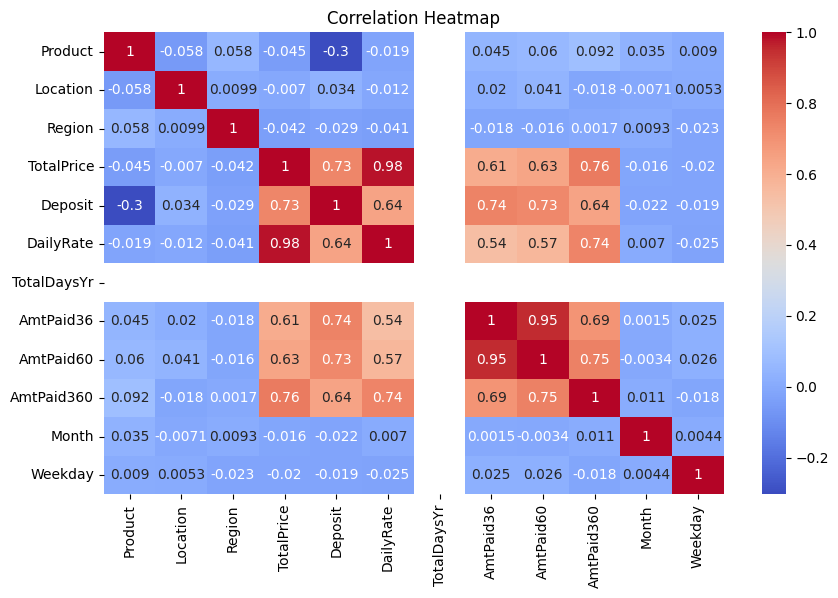

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only= True) , annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
df.drop('TotalDaysYr', axis=1, inplace=True)

In [53]:
df.shape

(1042, 13)

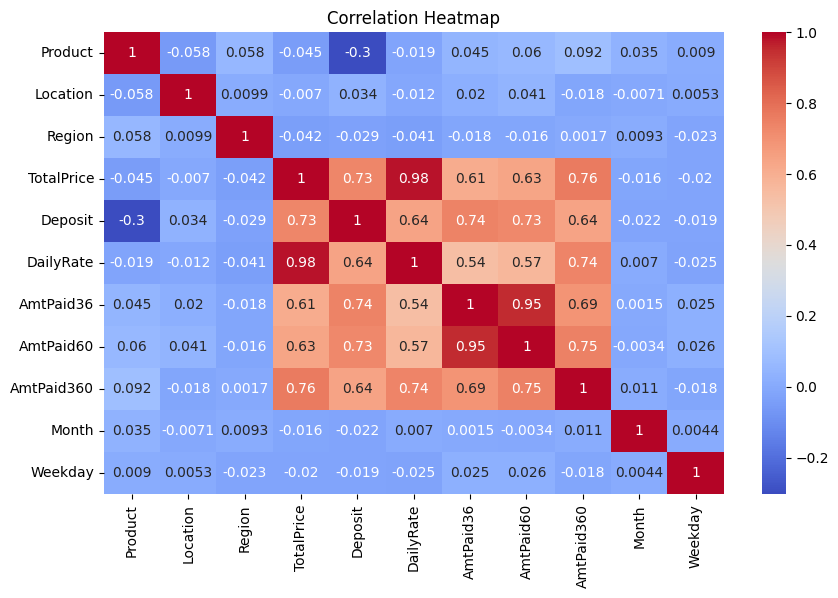

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only= True) , annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 8- Drop all rows with missing loan status values and where the status is 'Blocked'. Map Active to 0 and Finished Payment to 1

In [54]:
df['LoanStatus'].value_counts()

,count
LoanStatus,
Finished Payment,534
Active,459
Blocked,12


In [56]:
df['LoanStatus'].unique()

array(['Active', nan, 'Blocked', 'Finished Payment'], dtype=object)

In [57]:
df['LoanStatus'].isna().sum()

37

In [58]:
df.dropna(subset=['LoanStatus'], inplace=True)

In [59]:
df.shape

(1005, 13)

In [60]:
df.drop(df[df['LoanStatus'] == 'Blocked'].index, inplace=True)

In [61]:
df.shape

(993, 13)

In [62]:
df['LoanStatus'] = df['LoanStatus'].map({'Active': 0, 'Finished Payment': 1})

In [63]:
df['LoanStatus'].value_counts()

,count
LoanStatus,
1,534
0,459


In [64]:
df.dtypes

,0
Product,int64
CustomerGender,object
Location,int64
Region,int64
TotalPrice,float64
Deposit,int64
DailyRate,int64
AmtPaid36,int64
AmtPaid60,int64
AmtPaid360,int64


In [65]:
df['CustomerGender'] = df['CustomerGender'].map({'Male': 0, 'Female': 1})

In [67]:
df.dtypes

,0
Product,int64
CustomerGender,int64
Location,int64
Region,int64
TotalPrice,float64
Deposit,int64
DailyRate,int64
AmtPaid36,int64
AmtPaid60,int64
AmtPaid360,int64


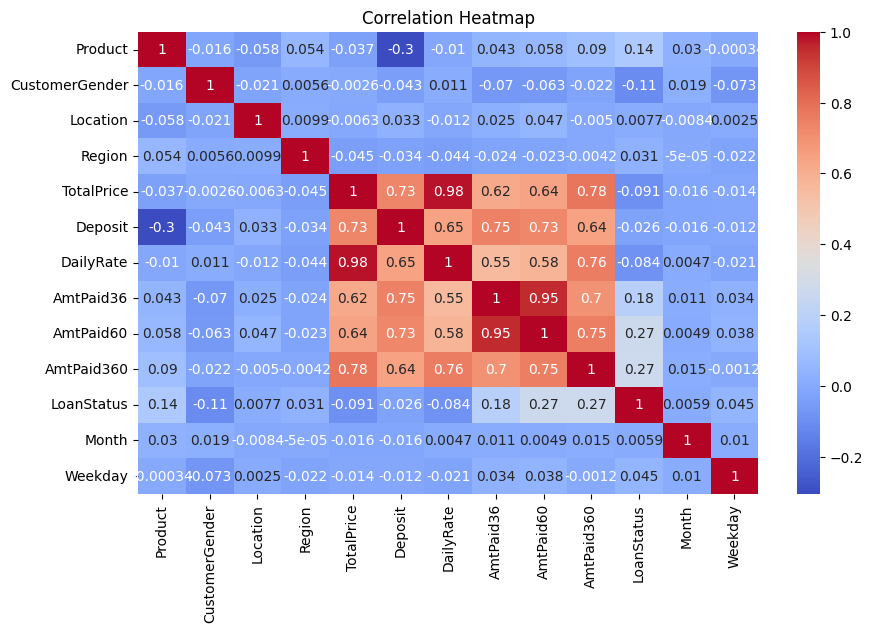

In [68]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only= True) , annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()